<a href="https://colab.research.google.com/github/sgajendra/hackathon_code/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import os
import zipfile
import glob

In [2]:
base_path = '/content/drive/MyDrive/Colab_Notebook/Hackathon'

In [3]:
def unzip_files(path):
  zipfiles =  glob.glob(path+'/'+'*.zip')
  for f in zipfiles:
    with zipfile.ZipFile(f, 'r') as zip:
      zip.extractall(path)
    print('file extract completed:',f)
  print('Files after unzipping the files', os.listdir(path))

In [4]:
#unzip_files(base_path)

In [5]:
os.listdir(base_path+'/'+'Train')

['data_dict.xlsx',
 '.DS_Store',
 'train_bureau.xlsx',
 'train_Data.xlsx',
 '2_rules.ipynb']

In [6]:
df = pd.read_excel('/content/drive/MyDrive/Colab_Notebook/Hackathon/Train/train_Data.xlsx')
b_df = pd.read_excel('/content/drive/MyDrive/Colab_Notebook/Hackathon/Train/train_bureau.xlsx')

In [8]:
df.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,DisbursalDate,MaturityDAte,AuthDate,AssetID,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month
0,1,Monthly,Arrear,Closed,PDC_E,1,NaN,48,450000,275000.0,275000.0,24000.0,2012-02-10,2016-01-15,2012-02-10,4022465,1568,21946,61.11,M,49.0,35833.33,RAISEN,MADHYA PRADESH,464993.0,> 48 Months
1,2,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,2012-03-31,2016-02-15,2012-03-31,4681175,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,No Top-up Service
2,3,Quatrly,Arrear,Active,Direct Debit,1,NaN,68,690000,519728.0,519728.0,38300.0,2017-06-17,2023-02-10,2017-06-17,25328146,1060,127335,69.77,M,39.0,45257.00,BHOPAL,MADHYA PRADESH,462030.0,12-18 Months
3,7,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,2013-11-29,2017-11-10,2013-11-29,13021591,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,> 48 Months
4,8,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,2011-12-08,2015-07-05,2011-12-08,3291320,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,36-48 Months


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128655 entries, 0 to 128654
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ID               128655 non-null  int64         
 1   Frequency        128655 non-null  object        
 2   InstlmentMode    128655 non-null  object        
 3   LoanStatus       128655 non-null  object        
 4   PaymentMode      128655 non-null  object        
 5   BranchID         128655 non-null  int64         
 6   Area             117002 non-null  object        
 7   Tenure           128655 non-null  int64         
 8   AssetCost        128655 non-null  int64         
 9   AmountFinance    128655 non-null  float64       
 10  DisbursalAmount  128655 non-null  float64       
 11  EMI              128655 non-null  float64       
 12  DisbursalDate    128655 non-null  datetime64[ns]
 13  MaturityDAte     128654 non-null  datetime64[ns]
 14  AuthDate         128

In [10]:
b_df.head()

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,LAST-PAYMENT-DATE,CREDIT-LIMIT/SANC AMT,DISBURSED-AMT/HIGH CREDIT,INSTALLMENT-AMT,CURRENT-BAL,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,1,False,PRIMARY,Overdraft,NAB,2018-04-30,Individual,Delinquent,2015-10-05,NaN,2018-02-27,NaN,"37,352",NaN,"37,873",NaN,"37,873",0.0,Standard,"20180430,20180331,",030000,"37873,12820,","37873,,",",,",NaN
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31,Individual,Active,2018-03-19,NaN,2019-12-19,NaN,"44,000","1,405/Monthly","20,797",F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",0000000000000000000000000000000000000000000000...,"20797,21988,23174,24341,25504,26648,27780,2891...",",,,,,,,,,,,,,,,,,,,,1452,,",",,,,,,,,,,,,,,,,,,,,,,",36.0
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2019-08-30,NaN,NaT,NaN,"1,45,000",NaN,"1,16,087",NaN,0,0.0,NaN,"20200131,20191231,20191130,20191031,20190930,2...",000000000000000000,"116087,116087,145000,145000,145000,145000,","0,0,0,0,0,0,",",,,,,,",NaN
3,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30,Individual,Closed,2013-09-27,2017-09-21 00:00:00,NaT,NaN,"3,00,000",NaN,0,NaN,0,0.0,NaN,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0270260270260270240270270000320000000000...,"0,,15925,23754,31494,39147,46713,54194,61590,6...","0,,1014,1014,1014,1014,1014,1014,1014,983,0,92...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29,Individual,Closed,2012-02-10,2016-02-01 00:00:00,NaT,NaN,"2,75,000",NaN,0,NaN,0,0.0,NaN,"20160229,20160131,20151231,20151130,20151031,2...",0000000000000000000000000000000000000000000000...,"0,0,23658,23321,22989,46321,45662,45012,68030,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN


In [11]:
b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560844 entries, 0 to 560843
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ID                         560844 non-null  int64         
 1   SELF-INDICATOR             560844 non-null  bool          
 2   MATCH-TYPE                 560844 non-null  object        
 3   ACCT-TYPE                  560844 non-null  object        
 4   CONTRIBUTOR-TYPE           560844 non-null  object        
 5   DATE-REPORTED              557161 non-null  datetime64[ns]
 6   OWNERSHIP-IND              560844 non-null  object        
 7   ACCOUNT-STATUS             560844 non-null  object        
 8   DISBURSED-DT               528694 non-null  datetime64[ns]
 9   CLOSE-DT                   309086 non-null  object        
 10  LAST-PAYMENT-DATE          241561 non-null  datetime64[ns]
 11  CREDIT-LIMIT/SANC AMT      15159 non-null   object  

In [12]:
print("shape of given train data:", df.shape)
print("shape of the given comtumer behavioyr data:",b_df.shape)

shape of given train data: (128655, 26)
shape of the given comtumer behavioyr data: (560844, 25)


In [13]:
#drop the missing value
df = df.dropna(axis=0)

#drop the columns with less variance.
df = df.drop(columns=['ID','AssetID'],axis=1)

In [14]:
#Outlier check:

#Split the features into numerical and catgorical value.
cat_feature = df.select_dtypes(include = 'object')
num_feature = df.select_dtypes(include = 'number')


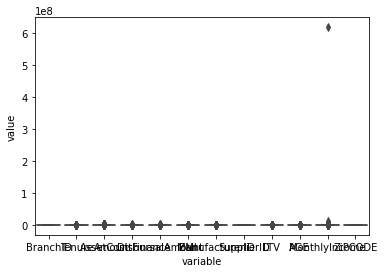

In [15]:
sns.boxplot(x="variable", y="value", data=pd.melt(num_feature))
#num_feature.plot(kind='box')
#plt.show()

In [16]:
def outliers_count(df, col):
  q_low = df[col].quantile(0.01)
  q_hi  = df[col].quantile(0.99)

  outlier_count = len(df[(df[col] >= q_hi) & (df[col] <= q_low)])
  return outlier_count

def filter_outlier(df, col):
  q_low = df[col].quantile(0.01)
  q_hi  = df[col].quantile(0.99)
  
  filter_data = df[(df[col] < q_hi) & (df[col] > q_low)]
  return filter_outlier

#No outliers in the data.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


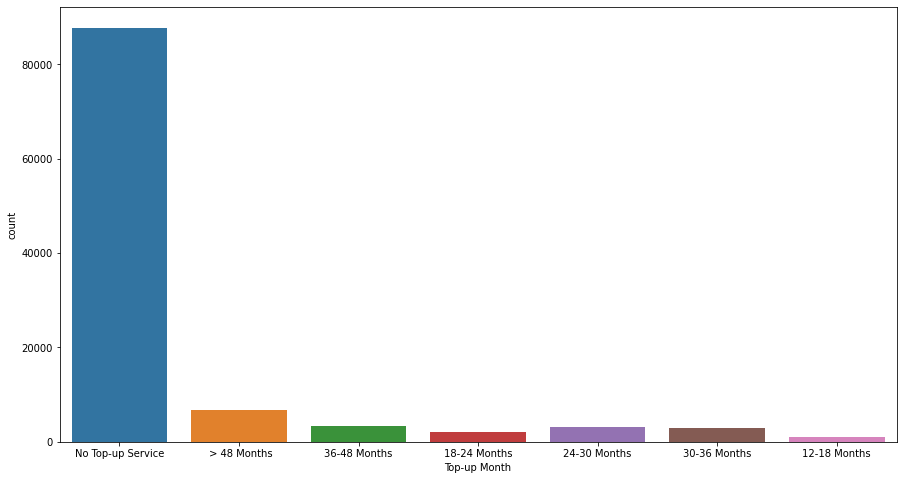

In [17]:
#Univariant Analysis:
plt.figure(figsize=(15,8))
sns.countplot(df['Top-up Month'])

The quantity of costumer with no top up service is high compare to costumer offered. This is the clear indication of imbalance in the data. 

Another point to to be noted here is data is multi classifier, In this case we have 7 class to predict..

In [18]:
df['Top-up Month'].value_counts()

No Top-up Service    87795
 > 48 Months          6783
36-48 Months          3400
24-30 Months          3207
30-36 Months          2846
18-24 Months          2138
12-18 Months           957
Name: Top-up Month, dtype: int64

In [19]:
# we have the label encoder for each of the classes
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Top-up Month'] = le.fit_transform(df['Top-up Month'])

df['Top-up Month'].value_counts()

6    87795
0     6783
5     3400
3     3207
4     2846
2     2138
1      957
Name: Top-up Month, dtype: int64

In [20]:
#sns.pairplot(num_feature)

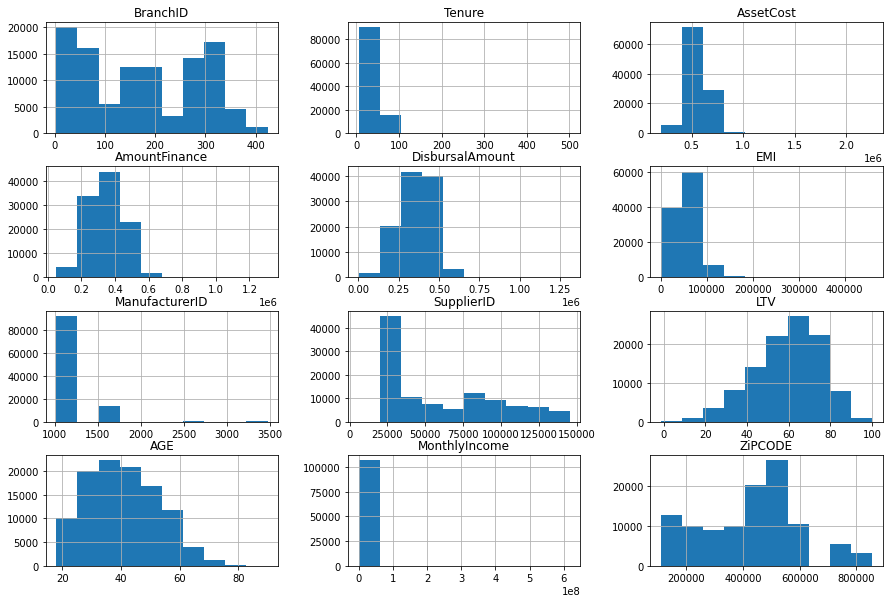

In [21]:
num_feature.hist(figsize=(15,10));

In [22]:
num_feature.describe()

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE
count,107126.000000,107126.000000,1.071260e+05,1.071260e+05,1.071260e+05,107126.000000,107126.000000,107126.000000,107126.000000,107126.000000,1.071260e+05,107126.000000
mean,173.975533,42.452701,5.613153e+05,3.538515e+05,3.534828e+05,56523.329058,1171.987641,59025.064961,59.400843,40.762075,5.290828e+04,424142.204189
std,115.806211,22.668813,1.048311e+05,1.061435e+05,1.059497e+05,28734.378703,260.339744,36938.555816,15.784552,11.817715,1.888126e+06,174248.248031
min,3.000000,5.000000,2.000000e+05,5.000000e+04,2.894000e+03,200.000000,1019.000000,5879.000000,-1.380000,18.000000,0.000000e+00,110000.000000
25%,53.000000,36.000000,5.100000e+05,3.000000e+05,3.000000e+05,34200.000000,1046.000000,24226.000000,49.230000,31.000000,2.500000e+04,285121.000000
50%,166.000000,36.000000,5.600000e+05,3.523680e+05,3.521410e+05,60850.000000,1062.000000,42584.000000,61.220000,40.000000,3.750000e+04,458339.000000
75%,281.000000,48.000000,6.198800e+05,4.207075e+05,4.200000e+05,74730.000000,1186.000000,89611.000000,71.190000,49.000000,5.058333e+04,521137.000000
max,424.000000,501.000000,2.250000e+06,1.308351e+06,1.308351e+06,460000.000000,3473.000000,145518.000000,100.000000,90.000000,6.174775e+08,855456.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


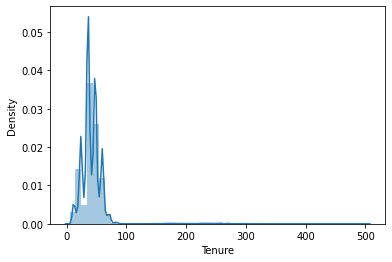

In [23]:
sns.distplot(num_feature['Tenure'])

In [24]:
def outlier_get_info(data):  
  data_mean, data_std = data.mean(), data.std()
  cut_off = data_std * 3.0
  lower, upper = data_mean - cut_off, data_mean + cut_off
  out_data = data[(data < lower) | (data > upper)] 
  count_out_data = len(out_data)
  return count_out_data,lower,upper

def remove_outliers(data):  
  data_mean, data_std = data.mean(), data.std()
  cut_off = data_std * 3.0
  lower, upper = data_mean - cut_off, data_mean + cut_off
  out_data = data[(data > lower) | (data < upper)] 
  return out_data

In [25]:
#Removing the outliers from the data:

#the outlier in the  tenure data makes no sense, no loan can be granted above 110 years ideally. Hence will consider to drop the rows  
num_feature['Tenure'] = remove_outliers(num_feature.iloc[:,1])
num_feature['AGE'] = remove_outliers(num_feature.iloc[:,9])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [26]:
check = df.isnull().sum().reset_index()
check.columns=['features', 'count']
check['miss_percent'] = 100 * (check['count']/len(df))
check['unique'] = check['features'].apply(lambda x: df[x].nunique())
check['unique_percent'] = check['features'].apply(lambda x: 100 * df[x].nunique()/len(df))
check['outliers_count'] = check['features'].apply(lambda x: outlier_get_info(num_feature[x]) if x in list(num_feature.columns) else 0)
check

,features,count,miss_percent,unique,unique_percent,outliers_count
0,Frequency,0,0.0,4,0.003734,0
1,InstlmentMode,0,0.0,2,0.001867,0
2,LoanStatus,0,0.0,2,0.001867,0
3,PaymentMode,0,0.0,11,0.010268,0
4,BranchID,0,0.0,170,0.158692,"(0, -173.44309974566144, 521.394166713531)"
5,Area,0,0.0,92,0.085880,0
6,Tenure,0,0.0,133,0.124153,"(1110, -25.553739421253333, 110.45914053769565)"
7,AssetCost,0,0.0,6081,5.676493,"(924, 246821.93548159784, 875808.6242144608)"
8,AmountFinance,0,0.0,18731,17.485018,"(310, 35421.18708706158, 672281.9025914468)"
9,DisbursalAmount,0,0.0,17947,16.753169,"(307, 35633.6149694334, 671331.9535862859)"


**************************************


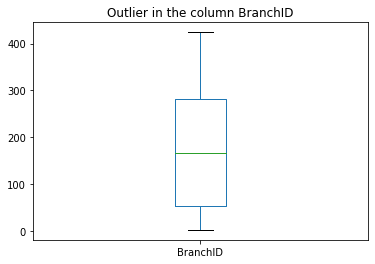

**************************************


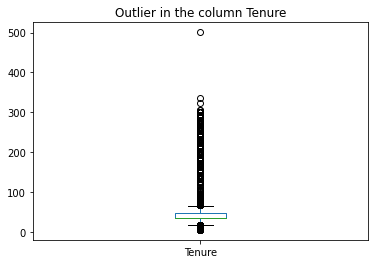

**************************************


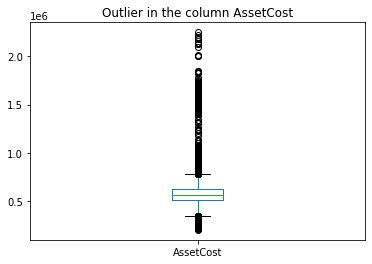

**************************************


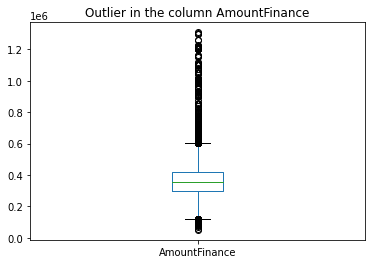

**************************************


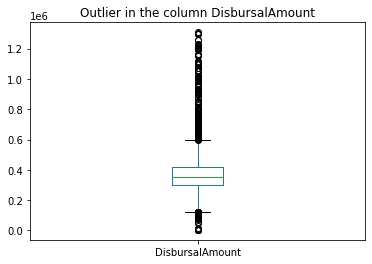

**************************************


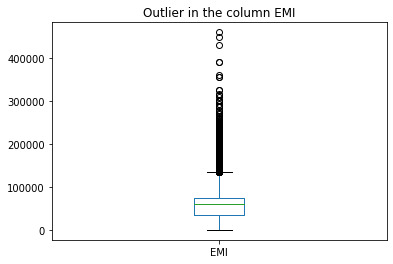

**************************************


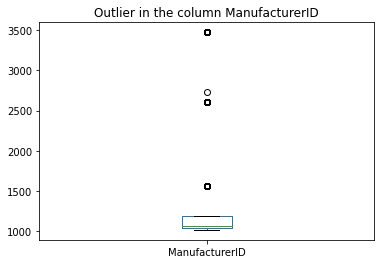

**************************************


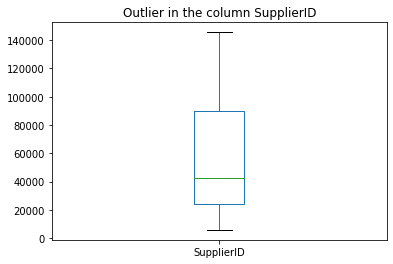

**************************************


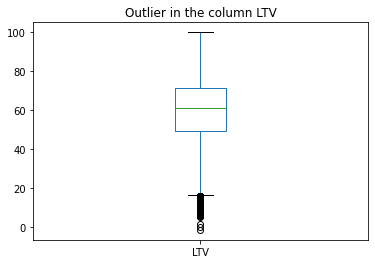

**************************************


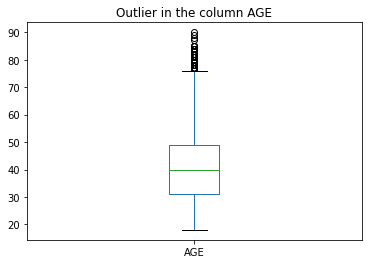

**************************************


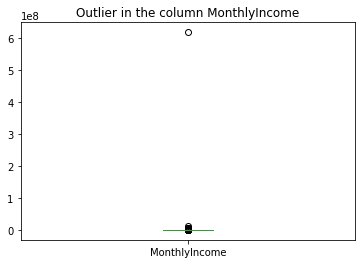

**************************************


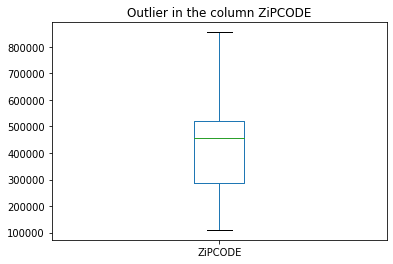

In [27]:
for col in list(num_feature.columns):
  plt.title('Outlier in the column'+' ' +col)
  print('**************************************')
  num_feature[col].plot(kind='box')
  plt.show()

In [ ]:
outlier_get_info(num_feature['Tenure'])

(1110, -25.553739421253333, 110.45914053769565)

In [29]:
num_feature[num_feature['AGE']>80].shape

(35, 12)

In [30]:
num_feature.apply(lambda x: outlier_get_info(x))

#These outlier can be meaningful.

,BranchID,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,AGE,MonthlyIncome,ZiPCODE
0,0.000000,1110.000000,924.000000,310.000000,307.000000,779.000000,1035.000000,0.000000,178.000000,122.000000,4.000000e+00,0.000000
1,-173.443100,-25.553739,246821.935482,35421.187087,35633.614969,-29679.807050,390.968409,-51790.602487,12.047188,5.308931,-5.611471e+06,-98602.539904
2,521.394167,110.459141,875808.624214,672281.902591,671331.953586,142726.465166,1953.006872,169840.732409,106.754498,76.215218,5.717287e+06,946886.948283


In [31]:
cat_feature.columns

Index(['Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode', 'Area',
       'SEX', 'City', 'State', 'Top-up Month'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


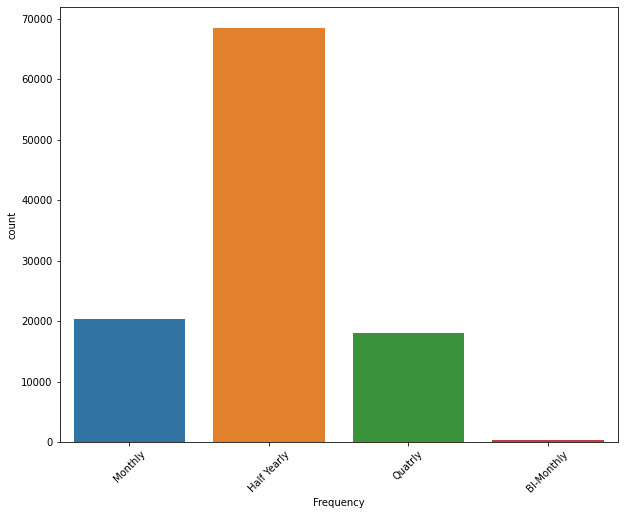

In [32]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.countplot(cat_feature['Frequency'])

#Most loan payment is half yearly.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


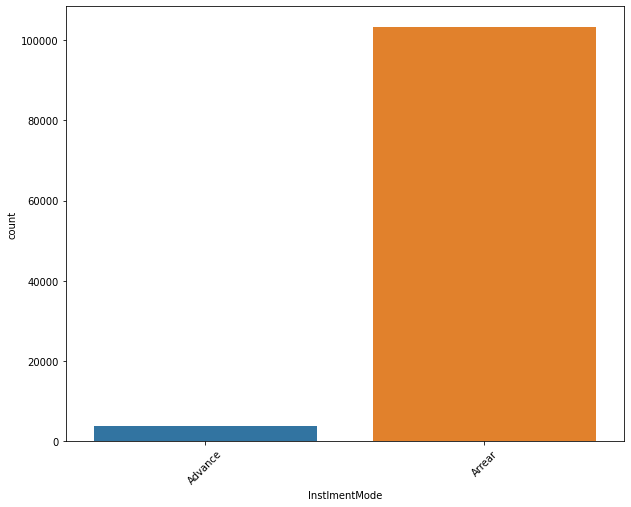

In [33]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.countplot(cat_feature['InstlmentMode'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


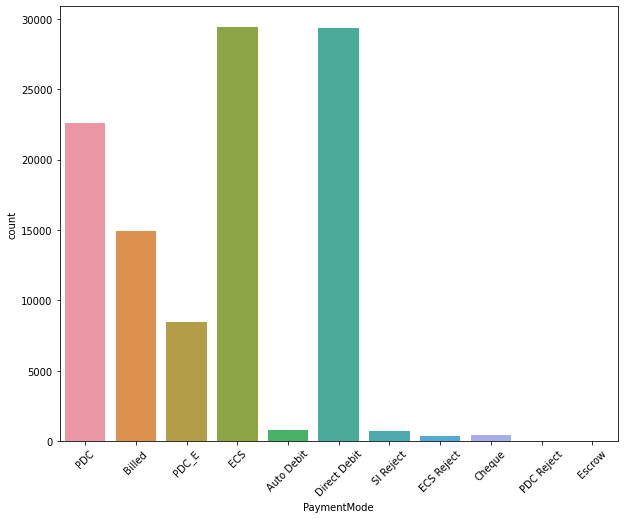

In [34]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.countplot(cat_feature['PaymentMode'])

#Clearly the account have the loan status as clear. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


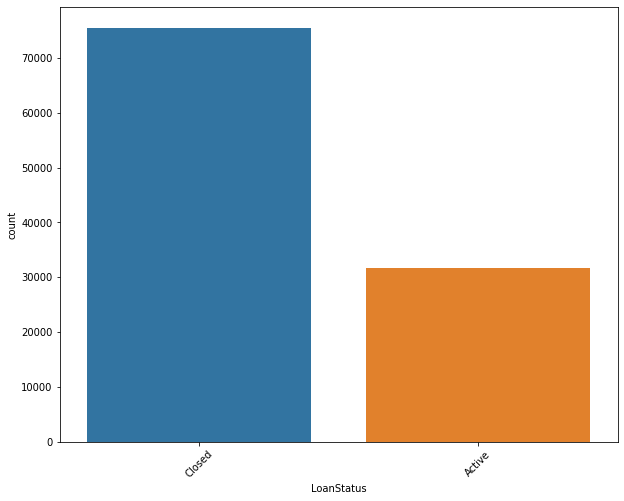

In [35]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.countplot(cat_feature['LoanStatus'])

#Clearly the account have the loan status as clear. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


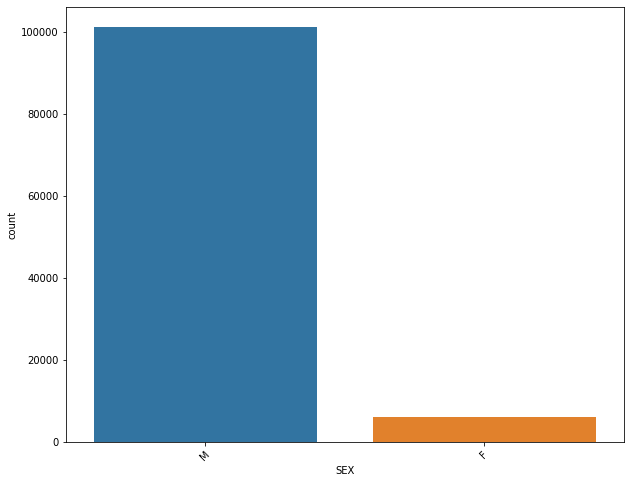

In [36]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.countplot(cat_feature['SEX'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


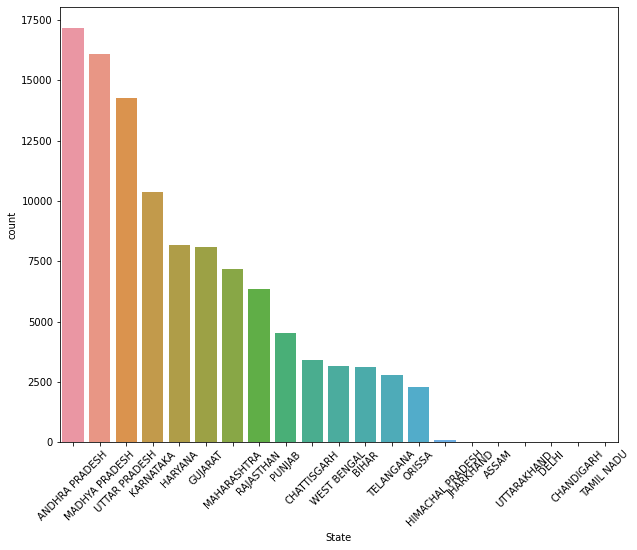

In [37]:
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
sns.countplot(cat_feature['State'],order=cat_feature['State'].value_counts().index)

In [38]:
cat_feature['State'].value_counts()

ANDHRA PRADESH      17177
MADHYA PRADESH      16106
UTTAR PRADESH       14261
KARNATAKA           10356
HARYANA              8171
GUJARAT              8111
MAHARASHTRA          7198
RAJASTHAN            6360
PUNJAB               4511
CHATTISGARH          3398
WEST BENGAL          3171
BIHAR                3119
TELANGANA            2779
ORISSA               2295
HIMACHAL PRADESH       70
JHARKHAND              20
ASSAM                  10
UTTARAKHAND             6
DELHI                   4
CHANDIGARH              2
TAMIL NADU              1
Name: State, dtype: int64

In [39]:
num_feature.columns, cat_feature.columns

(Index(['BranchID', 'Tenure', 'AssetCost', 'AmountFinance', 'DisbursalAmount',
        'EMI', 'ManufacturerID', 'SupplierID', 'LTV', 'AGE', 'MonthlyIncome',
        'ZiPCODE'],
       dtype='object'),
 Index(['Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode', 'Area',
        'SEX', 'City', 'State', 'Top-up Month'],
       dtype='object'))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


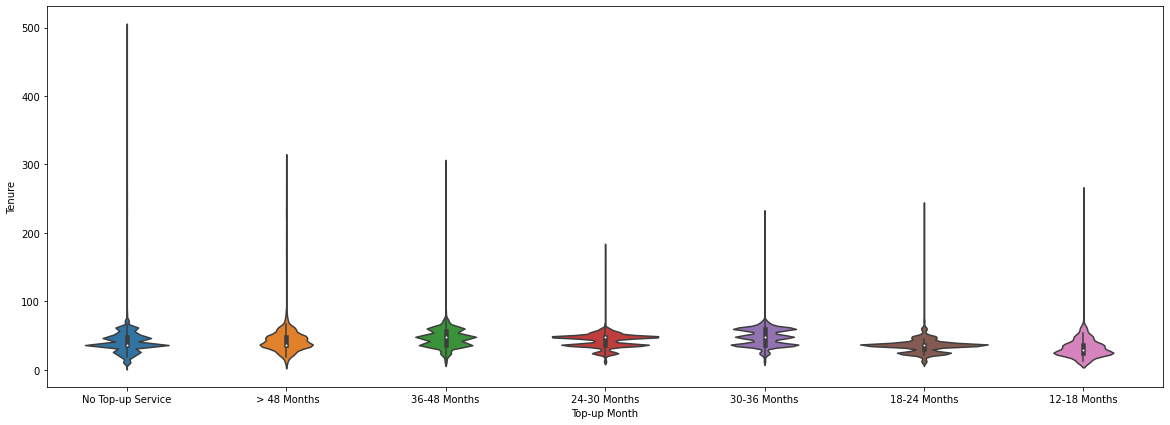

In [40]:
#Bivariant Analysis:

plt.figure(figsize=(20,7), facecolor='w', edgecolor='k')
sns.violinplot(cat_feature['Top-up Month'], num_feature['Tenure'], order=cat_feature['Top-up Month'].value_counts().index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


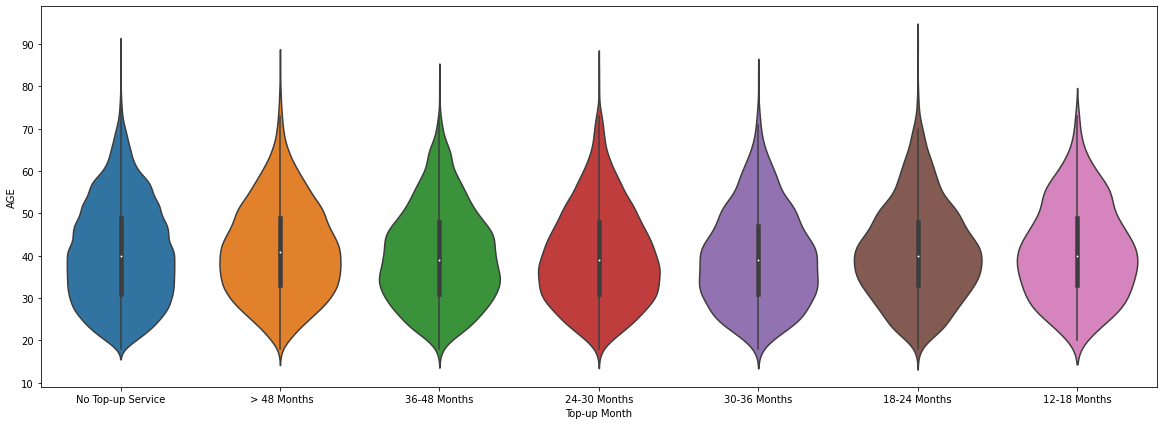

In [41]:
plt.figure(figsize=(20,7), facecolor='w', edgecolor='k')
sns.violinplot(cat_feature['Top-up Month'], num_feature['AGE'], order=cat_feature['Top-up Month'].value_counts().index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Amount Financed based on the Age')

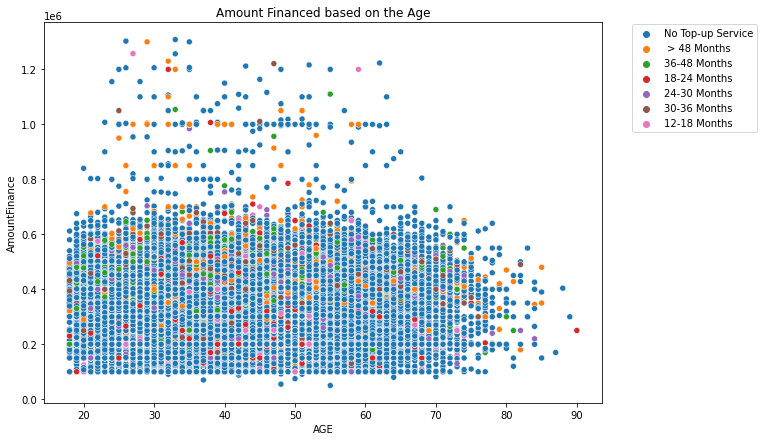

In [42]:
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.scatterplot(num_feature["AGE"], num_feature["AmountFinance"], hue=cat_feature["Top-up Month"],)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
plt.title("Amount Financed based on the Age")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Amount Financed based on the Tenure')

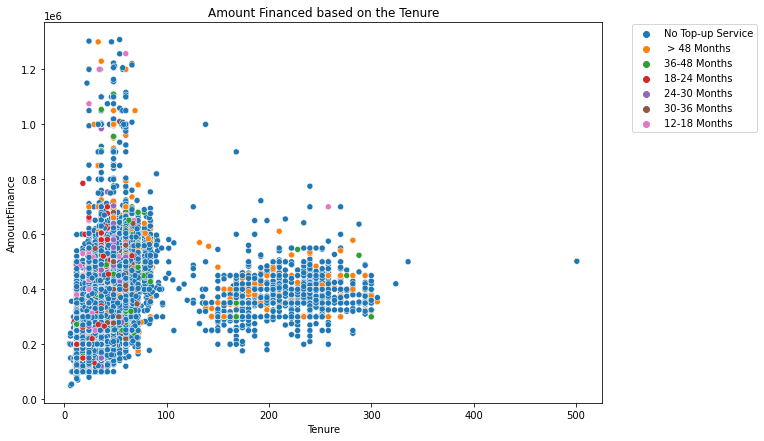

In [43]:
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.scatterplot(num_feature["Tenure"], num_feature["AmountFinance"], hue=cat_feature["Top-up Month"],)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
#plt.xticks(np.arange(0, 300))
plt.title("Amount Financed based on the Tenure")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Amount Financed based on the Tenure')

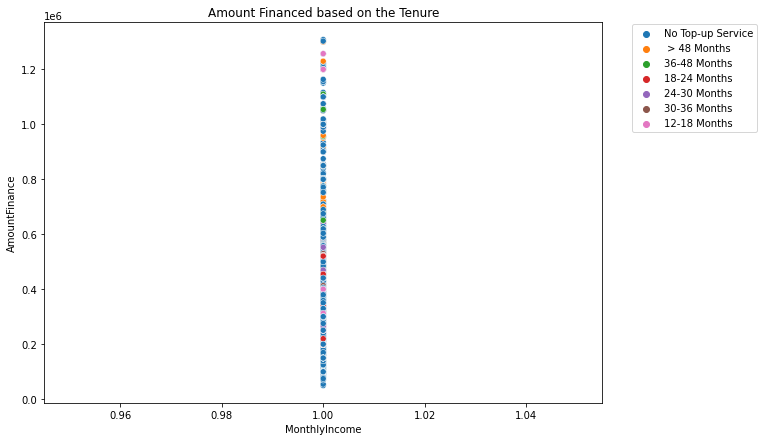

In [44]:
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.scatterplot((num_feature["MonthlyIncome"]<571728700000.0), num_feature["AmountFinance"], hue=cat_feature["Top-up Month"],)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
#plt.xticks(np.arange(0, 300))
plt.title("Amount Financed based on the Tenure")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


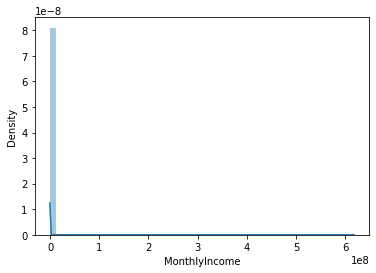

In [45]:
sns.distplot(num_feature['MonthlyIncome'])

In [46]:
df.columns

Index(['Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode', 'BranchID',
       'Area', 'Tenure', 'AssetCost', 'AmountFinance', 'DisbursalAmount',
       'EMI', 'DisbursalDate', 'MaturityDAte', 'AuthDate', 'ManufacturerID',
       'SupplierID', 'LTV', 'SEX', 'AGE', 'MonthlyIncome', 'City', 'State',
       'ZiPCODE', 'Top-up Month'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Loan Period and on the Age')

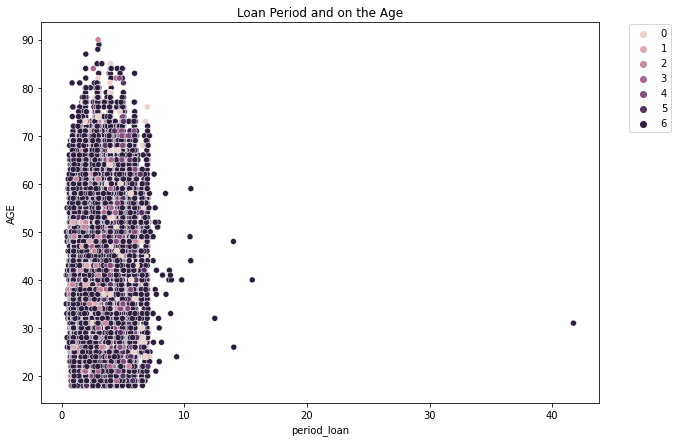

In [ ]:
plt.figure(figsize=(10,7), facecolor='w', edgecolor='k')
sns.scatterplot(df["period_loan"], df["AGE"], hue=df["Top-up Month"])
#sns.distplot(df["period_loan"], df["LoanStatus"], hue=cat_feature["Top-up Month"],)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.2)
plt.title("Loan Period and on the Age")

In [ ]:
means[['Rooms','Bedroom2', 'Bathroom', 'Car']].plot(yerr=var)

In [ ]:
df[['period_loan','Tenure']]

In [ ]:
num_feature['MonthlyIncome'].describe()

In [ ]:
def out_data_iqr(data):
  #cut_off = 0
  q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
  iqr = q75 - q25
  cut_off = iqr * 1.5
  lower, upper = q25 - cut_off, q75 - cut_off
  out_data = data[(data > lower) & (data < upper)]
  count_out_data = len(out_data)
  return count_out_data,lower,upper

In [ ]:
outlier_get_info(num_feature['MonthlyIncome'])

#Handling the date columns in the dadatset.

In [ ]:
date_var = df.select_dtypes('datetime')

In [ ]:
date_var.head()

,DisbursalDate,MaturityDAte,AuthDate
1,2012-03-31,2016-02-15,2012-03-31
3,2013-11-29,2017-11-10,2013-11-29
4,2011-12-08,2015-07-05,2011-12-08
5,2011-12-19,2015-12-15,2011-12-19
6,2011-12-31,2015-12-05,2011-12-31


In [ ]:
date_var.isnull().sum()

DisbursalDate    0
MaturityDAte     0
AuthDate         0
dtype: int64

In [ ]:
date_var.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning an

,DisbursalDate,MaturityDAte,AuthDate
count,107126,107126,107126
unique,2639,625,2540
top,2017-10-31 00:00:00,2018-06-10 00:00:00,2017-10-31 00:00:00
freq,1167,2100,1175
first,2010-02-09 00:00:00,2011-03-18 00:00:00,2010-02-09 00:00:00
last,2019-11-23 00:00:00,2059-08-10 00:00:00,2019-11-23 00:00:00


In [ ]:
df['period_loan'] = (date_var['MaturityDAte'] - date_var['DisbursalDate'])
df['period_loan'] = df['period_loan']/np.timedelta64(1,'Y')
df['period_loan'] = round(df['period_loan'], 2)

df = df.drop(columns = ['DisbursalDate','MaturityDAte','AuthDate'], axis=1)

#Visualization Analysis:

1. Numerical data Analaysis
2. Catagorical data Analaysis

1. Num and Num
2. Num and cat


In [ ]:
numerical = ['BranchID','Tenure','AssetCost','AmountFinance','DisbursalAmount','EMI','ManufacturerID','SupplierID','LTV','AGE','MonthlyIncome','ZiPCODE','period_loan']
categorical = ['Frequency','InstlmentMode','LoanStatus','PaymentMode','Area','SEX','City','State','Top-up Month']

In [ ]:
data = df[numerical + categorical]
data.shape

(107126, 22)

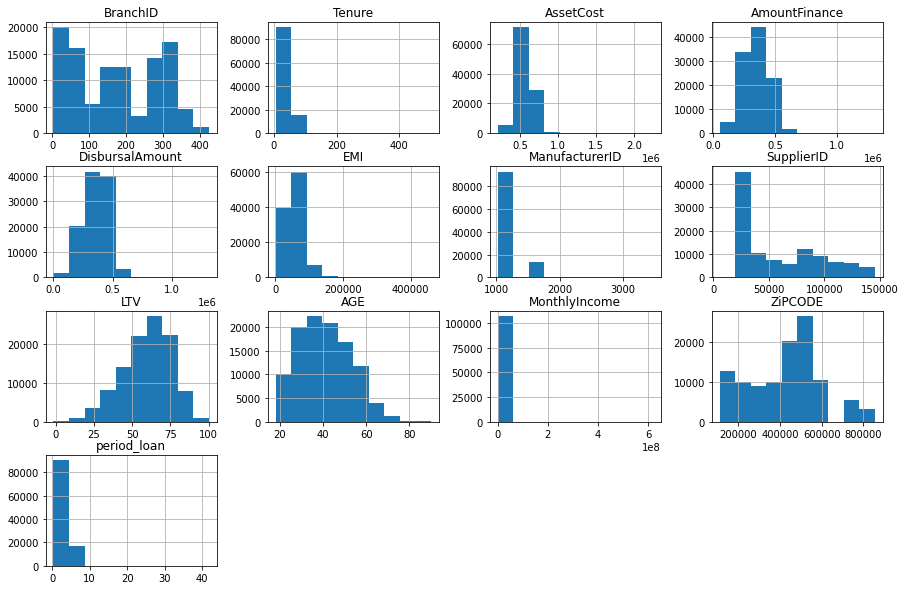

In [ ]:
data[numerical].hist(figsize=(15,10));

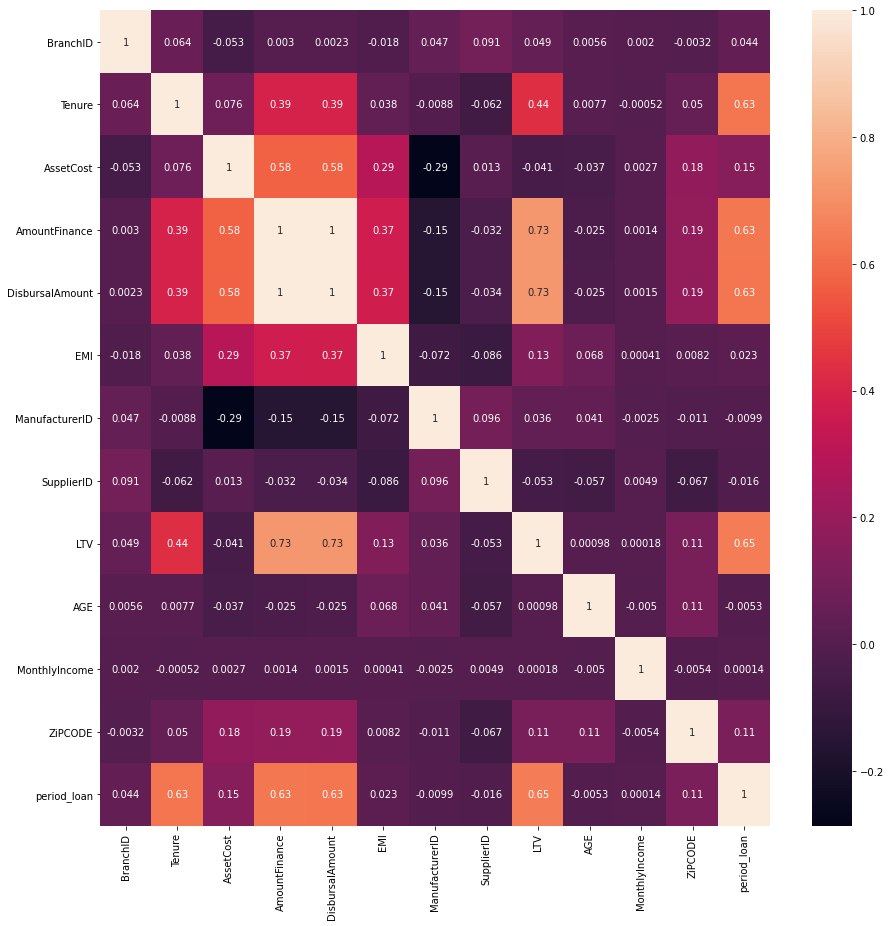

In [ ]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(data[numerical].corr(), annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


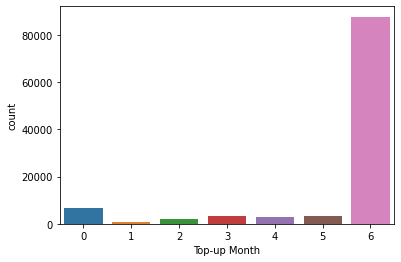

In [ ]:
sns.countplot(data['Top-up Month']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

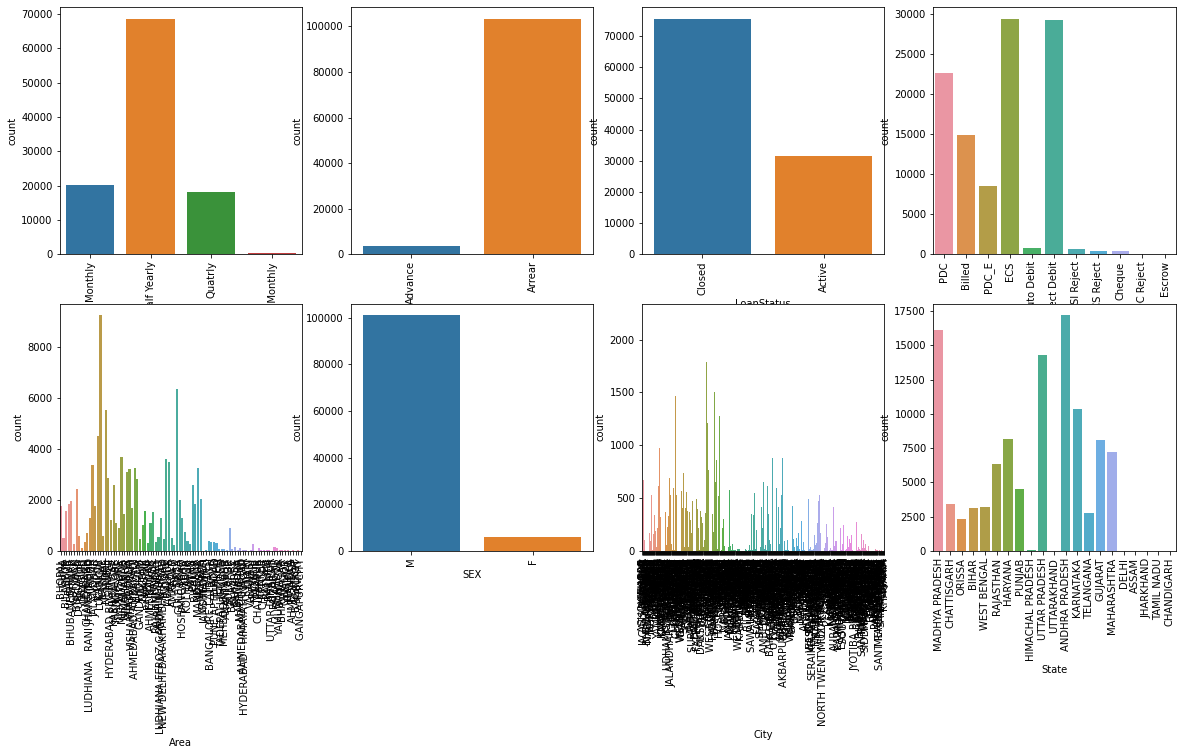

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

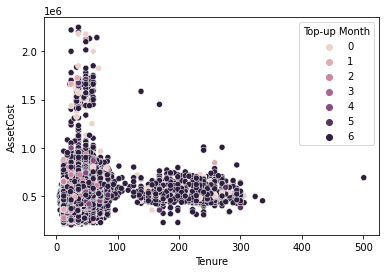

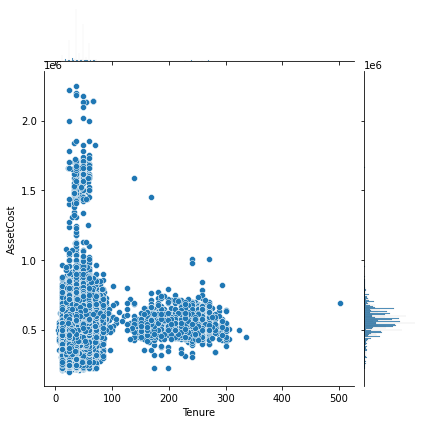

In [ ]:
#Relationship between numerical Variables:
sns.scatterplot(x=data['Tenure'], y=data['AssetCost'],hue=data['Top-up Month']);

sns.jointplot(x=data['Tenure'], y=data['AssetCost']);

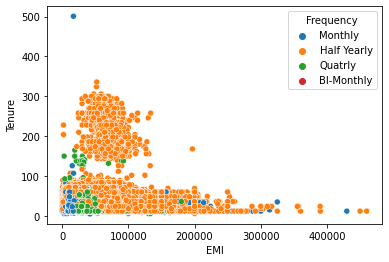

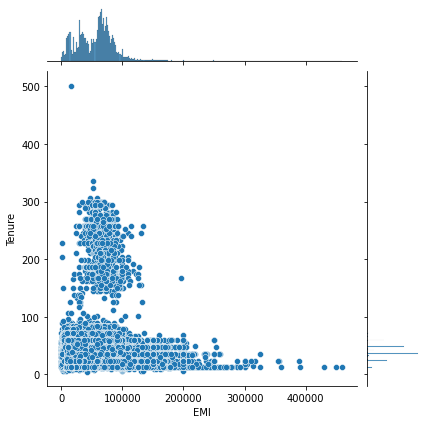

In [ ]:
#Relationship between numerical Variables:
sns.scatterplot(x=data['EMI'], y=data['Tenure'],hue=data['Frequency']);

sns.jointplot(x=data['EMI'], y=data['Tenure']);

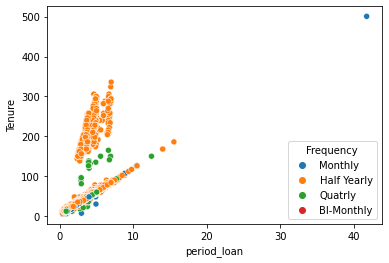

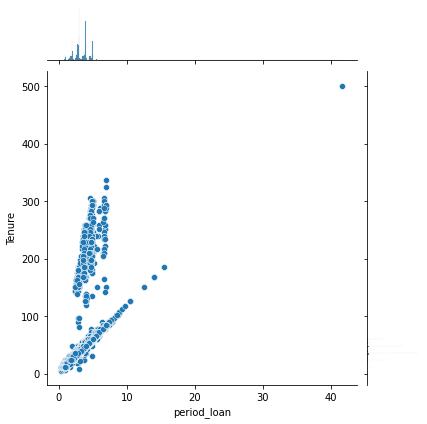

In [ ]:
#Relationship between numerical Variables:
sns.scatterplot(x=data['period_loan'], y=data['Tenure'],hue=data['Top-up Month']);

sns.jointplot(x=data['period_loan'], y=data['Tenure']);

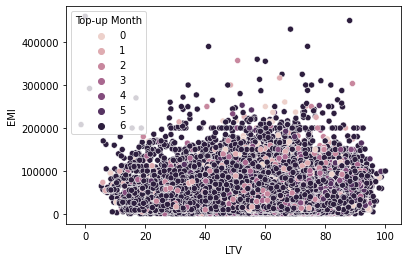

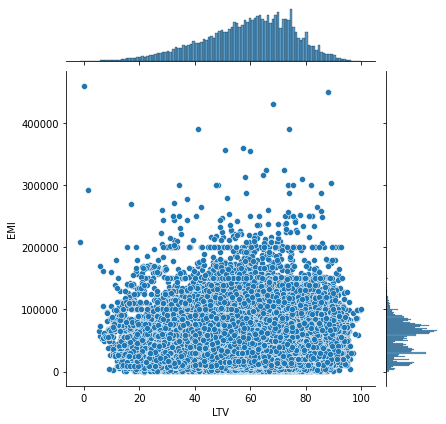

In [ ]:
#Relationship between numerical Variables:
sns.scatterplot(x=data['LTV'], y=data['EMI'],hue=data['Top-up Month']);

sns.jointplot(x=data['LTV'], y=data['EMI']);

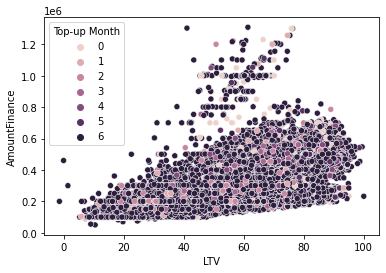

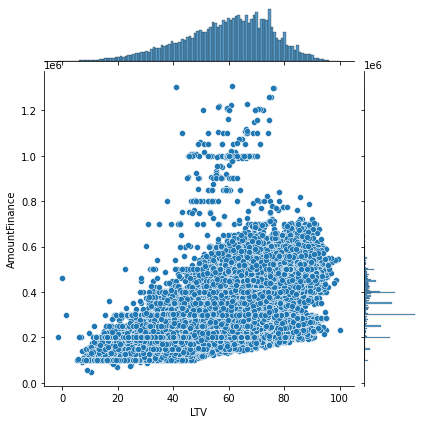

In [ ]:
#Relationship between numerical Variables:
sns.scatterplot(x=data['LTV'], y=data['AmountFinance'],hue=data['Top-up Month']);

sns.jointplot(x=data['LTV'], y=data['AmountFinance']);

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91]),
 <a list of 92 Text major ticklabel objects>)

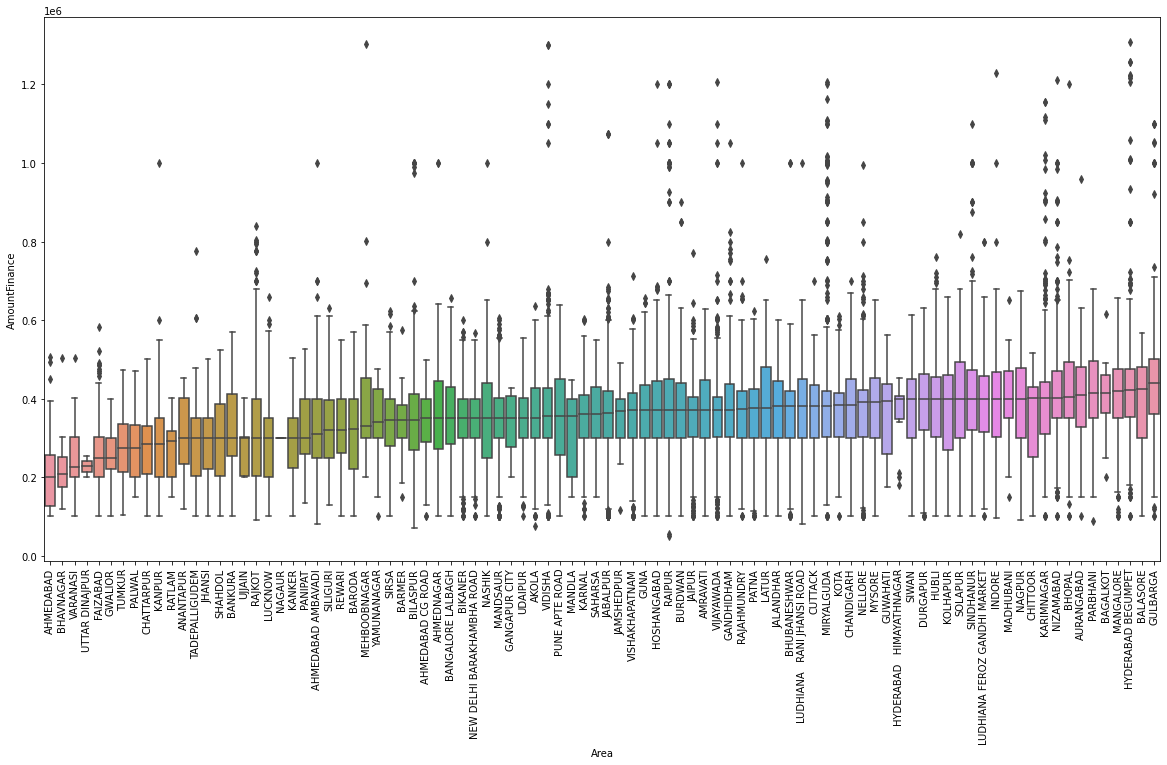

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sorted_nb = data.groupby(['Area'])['AmountFinance'].median().sort_values()
sns.boxplot(x=data['Area'], y=data['AmountFinance'], order=list(sorted_nb.index))
plt.xticks(rotation = 90)

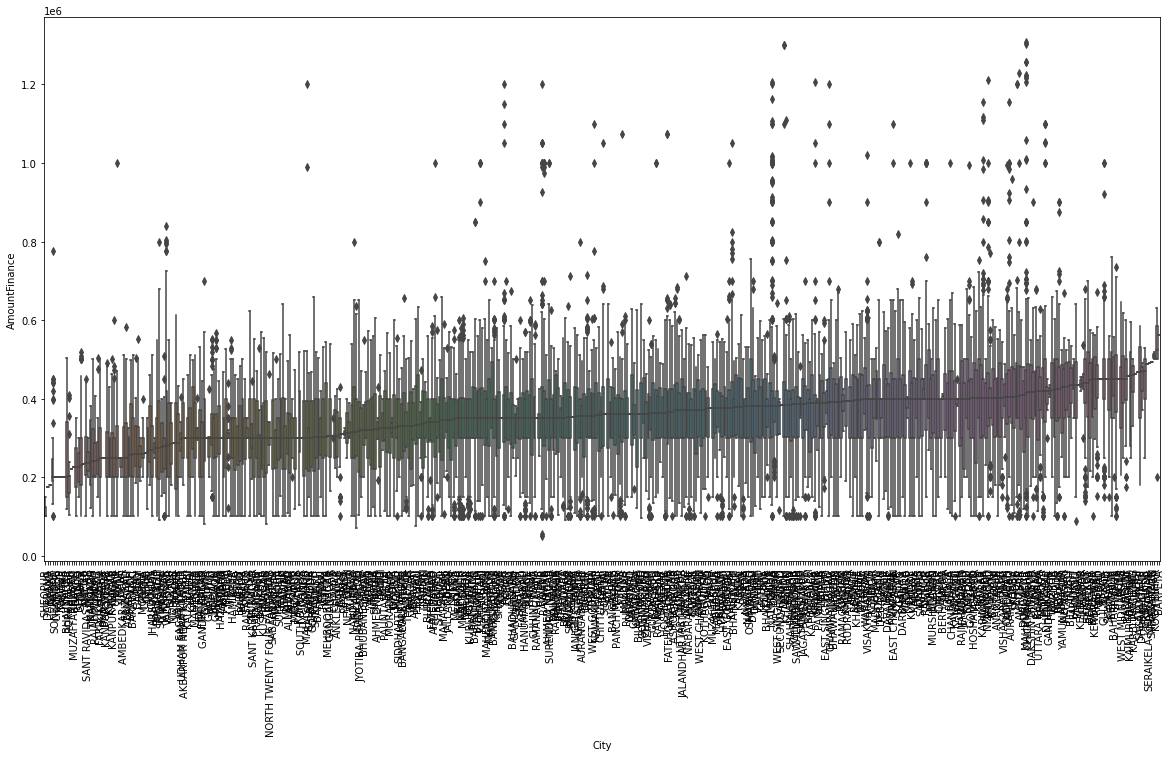

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
sorted_nb = data.groupby(['City'])['AmountFinance'].median().sort_values()
sns.boxplot(x=data['City'], y=data['AmountFinance'], order=list(sorted_nb.index))
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data.groupby(['State','City','Area'])[['AmountFinance','AssetCost','EMI','LTV']].median().sort_values(ascending=False, by='AmountFinance').reset_index()

,State,City,Area,AmountFinance,AssetCost,EMI,LTV
0,TELANGANA,NALGONDA,HYDERABAD BEGUMPET,1007754.0,2142793.0,10000.0,46.56
1,MAHARASHTRA,SOLAPUR,PUNE APTE ROAD,600000.0,733500.0,95700.0,68.75
2,ASSAM,BARPETA,GUWAHATI,563000.0,788405.0,14075.0,71.41
3,MAHARASHTRA,NANDED,AKOLA,553348.0,765000.0,85429.0,72.33
4,KARNATAKA,CHAMRAJNAGAR,HUBLI,550000.0,710999.0,101200.0,63.12
...,...,...,...,...,...,...,...
833,JHARKHAND,BOKARO,LUCKNOW,150000.0,465000.0,5000.0,31.18
834,UTTAR PRADESH,DEORIA,VARANASI,146000.0,560000.0,37950.0,26.07
835,MADHYA PRADESH,REWA,GUNA,140000.0,600000.0,77000.0,10.50
836,RAJASTHAN,HANUMANGARH,SIRSA,130000.0,320000.0,10000.0,40.63


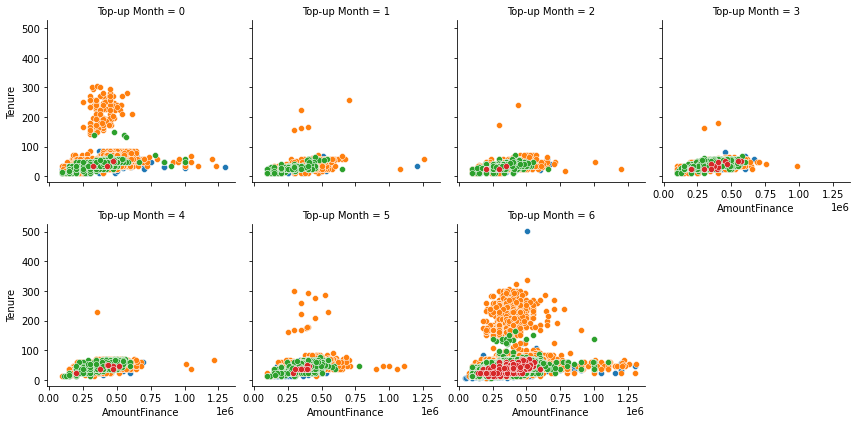

In [ ]:
cond_plot = sns.FacetGrid(data=data, col='Top-up Month', hue='Frequency', col_wrap=4)
cond_plot.map(sns.scatterplot, 'AmountFinance', 'Tenure');

In [ ]:
numerical,categorical

(['BranchID',
  'Tenure',
  'AssetCost',
  'AmountFinance',
  'DisbursalAmount',
  'EMI',
  'ManufacturerID',
  'SupplierID',
  'LTV',
  'AGE',
  'MonthlyIncome',
  'ZiPCODE',
  'period_loan'],
 ['Frequency',
  'InstlmentMode',
  'LoanStatus',
  'PaymentMode',
  'Area',
  'SEX',
  'City',
  'State',
  'Top-up Month'])

#Model Building:

In [ ]:
df['Top-up Month'].value_counts()

In [ ]:
target = df['Top-up Month']
train = df.drop(columns=['Top-up Month'], axis=1)

In [ ]:
#convert the data encoding values using one hot endoing or dummies.

train.head()

In [ ]:
df['Area'].value_counts()

In [ ]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components = 10)

#data 2: EDA

In [ ]:
b_df.head()

,ID,SELF-INDICATOR,MATCH-TYPE,ACCT-TYPE,CONTRIBUTOR-TYPE,DATE-REPORTED,OWNERSHIP-IND,ACCOUNT-STATUS,DISBURSED-DT,CLOSE-DT,LAST-PAYMENT-DATE,CREDIT-LIMIT/SANC AMT,DISBURSED-AMT/HIGH CREDIT,INSTALLMENT-AMT,CURRENT-BAL,INSTALLMENT-FREQUENCY,OVERDUE-AMT,WRITE-OFF-AMT,ASSET_CLASS,REPORTED DATE - HIST,DPD - HIST,CUR BAL - HIST,AMT OVERDUE - HIST,AMT PAID - HIST,TENURE
0,1,False,PRIMARY,Overdraft,NAB,2018-04-30,Individual,Delinquent,2015-10-05,NaN,2018-02-27,NaN,"37,352",NaN,"37,873",NaN,"37,873",0.0,Standard,"20180430,20180331,",030000,"37873,12820,","37873,,",",,",NaN
1,1,False,PRIMARY,Auto Loan (Personal),NAB,2019-12-31,Individual,Active,2018-03-19,NaN,2019-12-19,NaN,"44,000","1,405/Monthly","20,797",F03,NaN,0.0,Standard,"20191231,20191130,20191031,20190930,20190831,2...",0000000000000000000000000000000000000000000000...,"20797,21988,23174,24341,25504,26648,27780,2891...",",,,,,,,,,,,,,,,,,,,,1452,,",",,,,,,,,,,,,,,,,,,,,,,",36.0
2,1,True,PRIMARY,Tractor Loan,NBF,2020-01-31,Individual,Active,2019-08-30,NaN,NaT,NaN,"1,45,000",NaN,"1,16,087",NaN,0,0.0,NaN,"20200131,20191231,20191130,20191031,20190930,2...",000000000000000000,"116087,116087,145000,145000,145000,145000,","0,0,0,0,0,0,",",,,,,,",NaN
3,1,True,PRIMARY,Auto Loan (Personal),NBF,2017-09-30,Individual,Closed,2013-09-27,2017-09-21 00:00:00,NaT,NaN,"3,00,000",NaN,0,NaN,0,0.0,NaN,"20170930,20170801,20170731,20170630,20170531,2...",000DDD0270260270260270240270270000320000000000...,"0,,15925,23754,31494,39147,46713,54194,61590,6...","0,,1014,1014,1014,1014,1014,1014,1014,983,0,92...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN
4,1,True,PRIMARY,Tractor Loan,NBF,2016-02-29,Individual,Closed,2012-02-10,2016-02-01 00:00:00,NaT,NaN,"2,75,000",NaN,0,NaN,0,0.0,NaN,"20160229,20160131,20151231,20151130,20151031,2...",0000000000000000000000000000000000000000000000...,"0,0,23658,23321,22989,46321,45662,45012,68030,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,",NaN


In [ ]:
df.head()

,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Area,Tenure,AssetCost,AmountFinance,DisbursalAmount,EMI,ManufacturerID,SupplierID,LTV,SEX,AGE,MonthlyIncome,City,State,ZiPCODE,Top-up Month,period_loan
1,Monthly,Advance,Closed,PDC,333,BHOPAL,47,485000,350000.0,350000.0,10500.0,1062,34802,70.00,M,23.0,666.67,SEHORE,MADHYA PRADESH,466001.0,6,3.88
3,Monthly,Advance,Closed,Billed,125,GUNA,48,480000,400000.0,400000.0,11600.0,1060,25094,80.92,M,24.0,20833.33,ASHOK NAGAR,MADHYA PRADESH,473335.0,0,3.95
4,Monthly,Arrear,Closed,Billed,152,BILASPUR,44,619265,440000.0,440000.0,15000.0,1046,21853,71.05,M,56.0,27313.67,BILASPUR,CHATTISGARH,495442.0,5,3.57
5,Monthly,Arrear,Closed,Billed,5,RAIPUR,48,400000,280000.0,280000.0,53000.0,1019,54689,70.00,M,40.0,42083.33,RAIPUR,CHATTISGARH,493885.0,6,3.99
6,Monthly,Arrear,Closed,PDC_E,5,RAIPUR,48,716000,450000.0,450000.0,2000.0,1019,54689,62.85,M,23.0,46221.00,RAIPUR,CHATTISGARH,493889.0,6,3.93
